In [1]:
from rfpimp import *
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

/Users/garycastle/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df_og = pd.read_csv('Data/Clean_Real_Estate_With_Crime.csv')
pd.set_option('display.max_rows', None)

In [3]:
df_og.drop(df_og[df_og['Average School Rating'] == 'No Schools'].index, inplace=True)
df_og.astype({'Average School Rating': 'float128'}).dtypes

Unnamed: 0                                                                                       int64
ADDRESS                                                                                         object
CITY                                                                                            object
STATE OR PROVINCE                                                                               object
ZIP OR POSTAL CODE                                                                               int64
PRICE                                                                                            int64
BEDS                                                                                             int64
BATHS                                                                                          float64
SQUARE FEET                                                                                      int64
LOT SIZE                                                                 

In [4]:
df = df_og.copy()

In [5]:
df['PRICE'] = np.log(df['PRICE'])

In [27]:
df

,Unnamed: 0,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),MLS#,LATITUDE,LONGITUDE,Average School Rating,Crime per Capita (1000s)
0,0,11 Hazelbranch,Aliso Viejo,CA,92656,13.790193,3,2.50,1470,4950,1993,3,663,http://www.redfin.com/CA/Aliso-Viejo/11-Hazelb...,OC21181915,33.592613,-117.738368,8.333,1.629102
1,1,11 Sanderling Ln,Aliso Viejo,CA,92656,13.652992,3,2.50,1393,3000,1989,3,610,http://www.redfin.com/CA/Laguna-Beach/11-Sande...,LG21181169,33.592240,-117.749226,9,1.629102
2,2,5 Skygate,Aliso Viejo,CA,92656,14.115615,4,3.00,2918,5040,1989,5,463,http://www.redfin.com/CA/Aliso-Viejo/5-Skygate...,OC21160272,33.594179,-117.740063,8.333,1.629102
3,3,15 Starling Ln,Aliso Viejo,CA,92656,13.810498,3,2.50,1605,3480,1989,6,620,http://www.redfin.com/CA/Aliso-Viejo/15-Starli...,LG21176453,33.596696,-117.744324,9,1.629102
4,4,78 Summerland Cir,Aliso Viejo,CA,92656,14.253120,4,4.50,3258,5546,2011,10,475,http://www.redfin.com/CA/Aliso-Viejo/78-Summer...,CV21176676,33.595652,-117.723661,7.667,1.629102
5,5,42 Dawn Ln,Aliso Viejo,CA,92656,13.955273,4,2.50,2227,3311,1999,10,516,http://www.redfin.com/CA/Aliso-Viejo/42-Dawn-L...,OC21175500,33.569450,-117.737727,8.333,1.629102
6,6,26 Dawn Ln,Aliso Viejo,CA,92656,14.038654,3,2.50,2200,3615,2000,10,568,http://www.redfin.com/CA/Aliso-Viejo/26-Dawn-L...,OC21177947,33.570006,-117.736765,8.333,1.629102
7,7,11 Emerald Ter,Aliso Viejo,CA,92656,14.508158,5,4.50,3700,7329,2010,20,540,http://www.redfin.com/CA/Aliso-Viejo/11-Emeral...,OC21169907,33.598361,-117.731129,7.667,1.629102
8,8,19 Plateau,Aliso Viejo,CA,92656,13.828427,3,3.00,1439,3727,1999,22,704,http://www.redfin.com/CA/Aliso-Viejo/19-Platea...,OC21166914,33.575838,-117.733008,8.333,1.629102
9,9,18 Deer Creek Ln,Laguna Hills,CA,92653,13.652992,3,2.50,1769,4000,1986,31,480,http://www.redfin.com/CA/Laguna-Hills/18-Deer-...,PW21160563,33.594940,-117.713443,5.25,2.677376


In [6]:
df_train, df_test = train_test_split(df, test_size=.40)

In [7]:
features = ['BATHS', 'SQUARE FEET', 'LOT SIZE', 'PRICE','Average School Rating', 'Crime per Capita (1000s)', 'YEAR BUILT','LATITUDE']

In [8]:
df_train = df_train[features]
df_test = df_test[features]

In [9]:
X_train, y_train = df_train.drop('PRICE',axis=1), df_train['PRICE']
X_test, y_test = df_test.drop('PRICE',axis=1), df_test['PRICE']
#X_train['random'] = np.random.random(size=len(X_train))
#X_test['random'] = np.random.random(size=len(X_test))

In [10]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [11]:
rf.score(X_test, y_test)

0.8839151977204012

In [12]:
rf.score(X_train, y_train)

0.9818429317295619

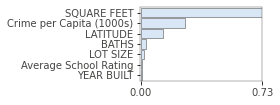

In [13]:
imp = importances(rf, X_test, y_test) # permutation
viz = plot_importances(imp)
viz.view()

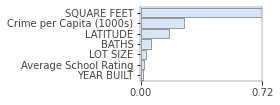

In [14]:
imp = importances(rf, X_train, y_train) # permutation
viz = plot_importances(imp)
viz.view()

In [17]:
sorted(zip(rf.feature_importances_, features), reverse=True)

[(0.5874203845879071, 'SQUARE FEET'),
 (0.14276570355362653, 'BATHS'),
 (0.12685154098528817, 'Average School Rating'),
 (0.07744211052995476, 'YEAR BUILT'),
 (0.032573943827878926, 'LOT SIZE'),
 (0.01912189859173648, 'Crime per Capita (1000s)'),
 (0.013824417923608084, 'PRICE')]

In [18]:
np.exp(rf.predict(X_test)[0])

725178.3324051229

In [19]:
predictions = np.exp(rf.predict(X_test))
predictions

array([  725178.33240512,  1177542.57745779,   881104.95631238,
        1065641.7963473 ,   968390.50255398,  1590102.15341805,
        3914324.90685978,  1081328.31720413,  3137335.11846854,
        1225292.0645597 ,  1716156.24119333,  1156621.41057361,
        5013371.44011013,   765060.53829249,  1330050.21784459,
        1506256.19604313,   943065.23313227, 25571313.02502404,
         901367.63957446,  2564136.20990738,  1577474.63455573,
         966308.42145239,  2306711.68035956,   704099.29848546,
        1205369.58384177,  4359619.07106424,  4417181.58873999,
        1090950.50980482, 10064211.10077894,   995764.14783773,
         813215.05326767,  2018943.52762625,   883781.74704359,
        2092369.09831148,  3297483.29541344,  9930531.16771434,
        1047605.42953219,  3349576.39956252,   858556.30692449,
        1505023.9067303 ,  2332773.73794172,   795998.93957474,
        1144866.19587331,   904160.27206259,  1009252.54613571,
        4907774.54241099,   991503.64813

In [20]:
X_test.iloc[0]

BATHS                             2
SQUARE FEET                    1214
LOT SIZE                       3055
Average School Rating         6.333
Crime per Capita (1000s)     1.5803
YEAR BUILT                     1976
LATITUDE                    33.5764
Name: 883, dtype: object

In [21]:
X_test.keys()

Index(['BATHS', 'SQUARE FEET', 'LOT SIZE', 'Average School Rating',
       'Crime per Capita (1000s)', 'YEAR BUILT', 'LATITUDE'],
      dtype='object')

In [ ]:
X_test.loc[lambda df: X_test['SQUARE FEET'] == 2107.00]

In [28]:
np.exp(13.764217)

949999.749602146

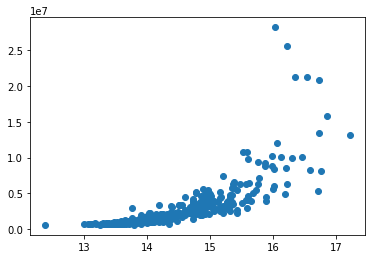

In [22]:
plt.scatter(y_test, predictions)

/Users/garycastle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

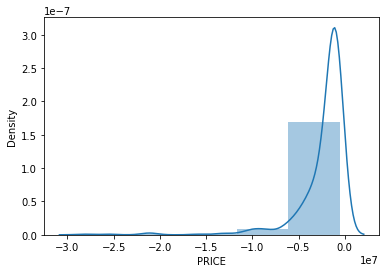

In [26]:
import seaborn as sns
sns.distplot((y_test-predictions), bins=5)